# ISYS 622 Project #1
## By Tanner Hefflefinger and Morgan Kaiser

***
### Description of Dataset

Data was selected from the large online clickstream data collected in 2011 by tracking over 100,000 unique household online shopping behavior. This small sample includes transactions for booking hotels online.

**Here's what the columns represent:**

* **ID**: unique transaction ID
* **DOMAIN_ID**: unique ID for the web domain
* **MACHINE_ID**: unique ID for the household on which the transaction was made
* **SITE_SESSION_ID**: unique ID for the session in which the transaction was made
* **TRANS_FREQ**: total # of transactions for the household
* **DOMAIN_NAME**: the website (aka domain) name where the transaction was made
* **DIRECT_D**: dummy variable. 1 = transaction incurred directly from a hotel website. 0 = transaction incurred from a third party travel website
* **PROD_NAME**: the product purchased by the household. ex: hotel or packages
* **PROD_TOTPRICE**: total price paid for this transaction
* **REF_DOMAIN_NAME**: the referring website (aka domain) name through which the final purchase websited was made
* **DURATION**: total time spent at a site (in minutes)
* **PAGES_VIEWED**: total pages viewed at a site
* **HOUSEHOLD_SIZE**: total # of people in the household
* **CHILDREN_D**: dummary variable. indicates whether household has any children
* **CONNECTIONSPEED_D**: dummy variable. indicates whether household has a high speed connection
***

Create the following 2 additional variables into your data:

* **REF_D**: create a dummy variable indicating whether the transaction was referenced<br>
    from other website, if not, the final booking website was directly accessed. If no<br>
    information provided for the variable REF_DOMAIN_NAME, REF_D = 0; otherwise<br>
    REF_D = 1)<br>
* **LOG_PRICE**: take the log transformation of the variable PROD_TOTPRICE<br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
hcs_data = pd.read_excel('HotelClickStream.xls')

In [3]:
hcs_data.head(20)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1
5,569,3010609366849421442,78515126,3893423575098,1,jetblue.com,0,"SAN DIEGO, CA, (SAN)~BOSTON, MA, (BOS) THU J...",3,1698.000000,aol.com,20.156250,2,2,1,1
6,1207,9530952911301729568,83769402,4366274465799,1,expedia.com,0,HOTEL - RIU PALACE CABO SAN LUCAS ALL INCLUSIV...,6,1556.759998,NaN,16.156250,9,4,1,1
7,451,9663188555341498165,76953668,3787166584900,3,hotwire.com,0,"HOTEL - THE REGENCY HOTEL - LONDON THU, JUN 16...",4,1554.719997,NaN,7.629883,13,5,0,1
8,2194,4024709573451844450,89081812,4368581595171,1,starwoodhotels.com,1,HOTEL-SHERATON SEATTLE HOTEL 07/08~07/10,8,1520.000000,NaN,10.158203,14,1,0,1
9,3194,1910370585147107479,93143690,4567230320752,1,bestwestern.com,1,BEST WESTERN PLAZA HOTEL SAUGATUCK AUGUST 18~A...,10,1511.899998,NaN,15.259766,10,2,0,1


In [4]:
hcs_data.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D'],
      dtype='object')

In [5]:
hcs_data['REF_DOMAIN_NAME'] = hcs_data['REF_DOMAIN_NAME'].replace(np.nan, 0)

In [6]:
hcs_data.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,0,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,0,47.546875,39,1,0,1
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1


In [7]:
def label_domain (row):
    if row['REF_DOMAIN_NAME'] == 0:
        return '0'
    else:
        return '1'

In [8]:
hcs_data.apply (lambda row: label_domain(row), axis=1)

0       0
1       1
2       1
3       0
4       1
5       1
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      0
20      1
21      0
22      0
23      0
24      1
25      1
26      1
27      0
28      0
29      1
       ..
3719    0
3720    1
3721    0
3722    0
3723    1
3724    1
3725    1
3726    1
3727    0
3728    1
3729    1
3730    1
3731    1
3732    0
3733    1
3734    0
3735    0
3736    0
3737    1
3738    0
3739    1
3740    0
3741    0
3742    0
3743    1
3744    1
3745    0
3746    0
3747    1
3748    1
Length: 3749, dtype: object

In [9]:
hcs_data['REF_D'] = hcs_data.apply (lambda row: label_domain(row), axis=1)

In [10]:
hcs_data.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,0,23.328125,13,6,1,1,0
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,0,47.546875,39,1,0,1,0
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1


In [11]:
hcs_data['LOG_PRICE'] = np.log(hcs_data['PROD_TOTPRICE'])

C:\Users\tanner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [12]:
hcs_data.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,0,23.328125,13,6,1,1,0,7.954035
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1,7.786112
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1,7.681560
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,0,47.546875,39,1,0,1,0,7.580036
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1,7.493874


In [13]:
hcs_data.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE'],
      dtype='object')

***
### 1A) Provide a summary table showing the top 10 domain names

In [14]:
top_domainnames = hcs_data.groupby(["DOMAIN_NAME"]).count().sort_values("TRANS_FREQ", ascending=False)

top_domainnames[['TRANS_FREQ']].head(10)

,TRANS_FREQ
DOMAIN_NAME,
marriott.com,524
hilton.com,438
hotels.com,400
expedia.com,380
priceline.com,309
choicehotels.com,297
jetblue.com,229
hotwire.com,217
bestwestern.com,120


### Part 1A Observations:

>**Marriott seems to have quite the lead** over second place - Hilton. Hilton, Hotels, and Expedia appear to be in a pack of their own, followed by the runners up.<br>

***
### 1B) Provide a summary table showing the top 10 reference domain names

*(REF_DOMAIN_NAME) that generated the highest volume of transactions.*

In [15]:
top_ref = hcs_data.groupby(["REF_DOMAIN_NAME"]).count().sort_values("TRANS_FREQ", ascending=False)

top_ref = top_ref[['TRANS_FREQ']]
top_ref[1:11]

,TRANS_FREQ
REF_DOMAIN_NAME,
google.com,620
yahoo.com,222
bing.com,129
aol.com,53
comfortinn.com,48
jetblue.com,43
qualityinn.com,29
comfortsuites.com,22
kayak.com,20


### Part 1B Observations:

>**Google has the clear lead.**<br>
With almost a 400 count difference, **Yahoo.com comes in second place.**<br>


***
### 1C) Provide summary statistics (N, Max, Min, Mean, and Std.) for the following variables...

* DIRECTP_D
* REF_D
* DURATION
* PAGES_VIEWED
* LOG_PRICE
* TRANS_FREQ

In [16]:
summ_hcs_data = hcs_data[['DIRECTP_D', 'REF_D', 'DURATION', 'PAGES_VIEWED', 'LOG_PRICE', 'TRANS_FREQ']]

In [17]:
summ_hcs_data.describe()

,DIRECTP_D,DURATION,PAGES_VIEWED,LOG_PRICE,TRANS_FREQ
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.481462,25.317508,18.331288,-inf,2.981328
std,0.499723,22.806497,16.636523,NaN,4.120927
min,0.000000,0.029999,1.000000,-inf,1.000000
25%,0.000000,9.449219,8.000000,4.275971,1.000000
50%,0.000000,17.777344,13.000000,4.753504,2.000000
75%,1.000000,33.656250,23.000000,5.298217,3.000000
max,1.000000,227.343750,141.000000,7.954035,30.000000


### Part 1C Observations:

> 75% of our transactions were incurred from a third party travel website

> 75% of our online customers view 8 pages or more

> 50% of our online customers spend 17.7 minutes on a site

> The highest number of transactions for a household was 30.

***
### 1D) Make a Scatter Plot and a Histogram for any variable

In [18]:
import matplotlib.pyplot as plt

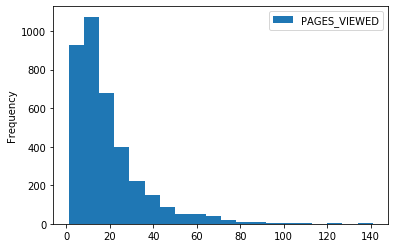

In [21]:
hcs_data.plot(x='DURATION', y='PAGES_VIEWED', kind='hist', bins=20)

### Histogram Interpretation

> As users view more pages beyond approximately 17, the time spent on each page decreases. 

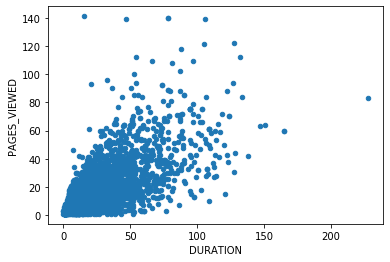

In [22]:
x = 'DURATION'
y = 'PAGES_VIEWED'
hcs_data.plot.scatter(x,y)

### Scatter plot #1 Interpretation
> Generally speaking, the longer an online customer is on a site the more pages they view.

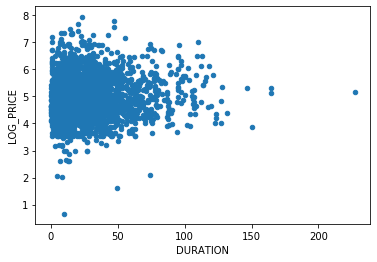

In [23]:
x = 'DURATION'
y = 'LOG_PRICE'
hcs_data.plot.scatter(x,y)

### Scatter Plot #2 Interpretation

> Duration does not seem to affect how much someone will spend during any given session.

***
### 2A) What are the factors that influence how much time people spend on a website?
* Use DURATION as your DV

Please report...

* final set of independent variables you have chosen and why you have chosen them
* estimated regression equation with simple explanations for each estimated coefficient (β)

In [24]:
import statsmodels.api as sm

continue using hcs_data from question 1

In [25]:
hcs_data.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,0,23.328125,13,6,1,1,0,7.954035
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1,7.786112
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1,7.681560
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,0,47.546875,39,1,0,1,0,7.580036
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1,7.493874


### Checking for correlation across all variables

In [26]:
hcs_data_corr = hcs_data.corr(method='pearson')
hcs_data_corr

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,LOG_PRICE
ID,1.000000,0.038586,0.952295,0.004208,-0.114883,-0.034965,0.005063,-0.007324,0.029594,0.022560,0.002909,-0.095701,0.000156,0.016452
DOMAIN_ID,0.038586,1.000000,0.038751,-0.007248,-0.089012,-0.351144,0.118018,0.033271,0.036471,0.064118,0.007169,0.010310,-0.026072,0.026002
MACHINE_ID,0.952295,0.038751,1.000000,0.012307,-0.117147,-0.036581,0.014423,-0.002471,0.035211,0.027896,-0.004405,-0.097963,-0.003886,0.016304
SITE_SESSION_ID,0.004208,-0.007248,0.012307,1.000000,-0.017602,-0.030781,-0.015716,-0.010711,-0.030520,-0.043054,0.002602,-0.036044,0.032614,-0.037176
TRANS_FREQ,-0.114883,-0.089012,-0.117147,-0.017602,1.000000,0.163209,-0.065697,-0.052992,-0.010917,0.025028,-0.037308,-0.085999,0.036545,-0.101673
DIRECTP_D,-0.034965,-0.351144,-0.036581,-0.030781,0.163209,1.000000,-0.122628,-0.072143,-0.182002,-0.065661,-0.016967,0.022890,0.011958,-0.106615
PROD_QTY,0.005063,0.118018,0.014423,-0.015716,-0.065697,-0.122628,1.000000,0.489334,0.127122,0.126278,0.001331,-0.002309,0.003952,0.531137
PROD_TOTPRICE,-0.007324,0.033271,-0.002471,-0.010711,-0.052992,-0.072143,0.489334,1.000000,0.032113,-0.024857,0.001598,-0.016192,-0.003924,0.830591
DURATION,0.029594,0.036471,0.035211,-0.030520,-0.010917,-0.182002,0.127122,0.032113,1.000000,0.685071,-0.014173,0.044570,-0.021533,0.089184
PAGES_VIEWED,0.022560,0.064118,0.027896,-0.043054,0.025028,-0.065661,0.126278,-0.024857,0.685071,1.000000,-0.008607,0.033867,-0.007393,0.030884


### Interpretation
>The 3 most correlated variables to "DURATION" are **PAGES_VIEWED, PROD_QTY and DIRECTP_D**.<br>
>We came to this conclusion by examining which correlation coefficients related to DURATION were farthest from 0.


In [27]:
r_model=sm.OLS(hcs_data.DURATION,hcs_data[['PAGES_VIEWED','PROD_QTY','DIRECTP_D']])

In [28]:
regress_m=r_model.fit()

In [29]:
regress_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               DURATION   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              3762.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                        0.00
Time:                        10:02:31   Log-Likelihood:                         -15943.
No. Observations:                3749   AIC:                                  3.189e+04
Df Residuals:                    3746   BIC:                                  3.191e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PAGES_VIEWED     1.0582      0.015     70.708      0.000       1.029       1.088
PROD_QTY         2.4174      0.168     14.386      0.000       2.088       2.747
DIRECTP_D       -0.9122      0.474     -1.924      0.054      -1.842       0.017
==============================================================================
Omnibus:                      977.303   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7830.923
Skew:                           1.015   Prob(JB):                         0.00
Kurtosis:                       9.783   Cond. No.                         42.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
ind_var=sm.add_constant(hcs_data[['PAGES_VIEWED','PROD_QTY','DIRECTP_D']])

C:\Users\tanner\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
r_model=sm.OLS(hcs_data.DURATION, ind_var)
rresults=r_model.fit()
print(rresults.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     1194.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:02:33   Log-Likelihood:                -15785.
No. Observations:                3749   AIC:                         3.158e+04
Df Residuals:                    3745   BIC:                         3.160e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6411      0.585     18.194   

### Regression Results for 2A
> PAGES_VIEWED had a coefficient of 0.9226 meaning for every 1 unit increase of DURATION, PAGES_VIEWED would increase by 0.9226 units

>PROD_QTY had a coefficient of 0.4212 meaning for every 1 unit increase of DURATION, PROD_QTY would increase by 0.4212 units

>DIRECTP_D had a coefficient of -6.1461 meaning for every 1 unit increase of DURATION, DIRECTP_D would decrease by 6.1461 units

### Regression Equation for 2A

>10.6411 + 0.9226PAGES_VIEWED + 0.4212PROD_QTY - 6.1461DIRECTP_D

***
### 2B) What are the factors that influence how many pages people view when visiting a website?

* Use PAGES_VIEWED as your DV.
* Decide your IVs by conducting the similar exercises in the above analysis.
* ONLY report and interpret your final regression results.

In [32]:
r2_model=sm.OLS(hcs_data.PAGES_VIEWED,hcs_data[['PROD_QTY','DURATION','DIRECTP_D']])

In [33]:
regress_m2=r2_model.fit()

In [34]:
regress_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           PAGES_VIEWED   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              3931.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                        0.00
Time:                        10:02:59   Log-Likelihood:                         -14683.
No. Observations:                3749   AIC:                                  2.937e+04
Df Residuals:                    3746   BIC:                                  2.939e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PROD_QTY       1.1783      0.122      9.672      0.000       0.939       1.417
DURATION       0.5403      0.008     70.708      0.000       0.525       0.555
DIRECTP_D      4.0315      0.333     12.124      0.000       3.380       4.683
==============================================================================
Omnibus:                     1549.959   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20959.102
Skew:                           1.592   Prob(JB):                         0.00
Kurtosis:                      14.137   Cond. No.                         57.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
ind_var=sm.add_constant(hcs_data[['PROD_QTY','DURATION','DIRECTP_D']])

In [36]:
r_model2=sm.OLS(hcs_data.PAGES_VIEWED, ind_var)
rresults2=r_model2.fit()
print(rresults2.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:03:01   Log-Likelihood:                -14652.
No. Observations:                3749   AIC:                         2.931e+04
Df Residuals:                    3745   BIC:                         2.934e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5546      0.447      7.947      0.0

### Regression Results for 2B


>PROD_QTY had a coefficient of 0.5575 meaning for every 1 unit increase of PAGES_VIEWED, PROD_QTY would increase by 0.5575 units

>DURATION had a coefficient of 0.5042 meaning for every 1 unit increase of PAGES_VIEWED, DURATION would increase by 0.5042 units

>DIRECTP_D had a coefficient of 2.1915 meaning for every 1 unit increase of PAGES_VIEWED, DIRECTP_D would increase by 2.1915 units

### Regression Equation for 2B

>3.5546 + 0.5575PROD_QTY + 0.5042DURATION + 2.1915DIRECTP_D

***
### 2C) Compare the results from 2A and 2B

**REMINDER:**

*2A asked "what are the factors that influence how much time people spend on a website?"*

*2B asked "what are the factors that influence how many pages people view when visiting a website?"*

> When testing for the correlation between PAGES_VIEWED and DURATION, 2A had a coeffecient of 0.9226 whereas 2B had a coefficient of 0.5042. **It seemed that there was stronger evidence that the longer people spent on a website the more pages they viewed** instead of the more pages people viewed the longer they spent on a website.

> PROD_QTY had a stronger, positive relationship with PAGES_VIEWED than DURATION. This means that **the more "product" a person was purchasing the more pages they viewed**.

> DIRECTP_D has a stronger, negative relationship with DURATION than PAGES_VIEWED. In other words, **2A will likely be a better indicator of change as the changes will be more severe and easier to spot with lower change in DURATION**. 